In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style='darkgrid')

In [2]:
from matplotlib import rc,font_manager
font_path='C:/Windows/Fonts/gulim.ttc'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

plt.rcParams['figure.figsize']=(10,9)
plt.rcParams['axes.unicode_minus']=False #축의 마이너스 기호를 유니코드로 바꾸지마라

In [10]:

# df=pd.read_csv('data/train-data.csv')
# df = df.fillna(value=np.nan)
# numbers = df['Mileage'].str.extractall(r'(\d+)').astype(float)
# numbers.to_csv('data/train-data2.csv', index=False)

In [3]:
data=pd.read_csv('data/train-data.csv')
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [4]:
# 원하는 항목만 추출
data1=data.loc[:,['Name','Year','Kilometers_Driven','Mileage','Engine','New_Price','Price']]
data1

,Name,Year,Kilometers_Driven,Mileage,Engine,New_Price,Price
0,Maruti Wagon R LXI CNG,2010,72000,26.6 km/kg,998 CC,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67 kmpl,1582 CC,NaN,12.50
2,Honda Jazz V,2011,46000,18.2 kmpl,1199 CC,8.61 Lakh,4.50
3,Maruti Ertiga VDI,2012,87000,20.77 kmpl,1248 CC,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.2 kmpl,1968 CC,NaN,17.74
...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,28.4 kmpl,1248 CC,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,24.4 kmpl,1120 CC,NaN,4.00
6016,Mahindra Xylo D4 BSIV,2012,55000,14.0 kmpl,2498 CC,NaN,2.90
6017,Maruti Wagon R VXI,2013,46000,18.9 kmpl,998 CC,NaN,2.65


In [6]:
# 널값 채우는 방법
data1.New_Price=data1.New_Price.fillna('0')
data1

,Name,Year,Kilometers_Driven,Mileage,Engine,New_Price,Price
0,Maruti Wagon R LXI CNG,2010,72000,26.6 km/kg,998 CC,0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67 kmpl,1582 CC,0,12.50
2,Honda Jazz V,2011,46000,18.2 kmpl,1199 CC,8.61 Lakh,4.50
3,Maruti Ertiga VDI,2012,87000,20.77 kmpl,1248 CC,0,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.2 kmpl,1968 CC,0,17.74
...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,28.4 kmpl,1248 CC,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,24.4 kmpl,1120 CC,0,4.00
6016,Mahindra Xylo D4 BSIV,2012,55000,14.0 kmpl,2498 CC,0,2.90
6017,Maruti Wagon R VXI,2013,46000,18.9 kmpl,998 CC,0,2.65


In [8]:
new_price=list(data1.New_Price)
print(new_price)
price=list(data1.Price)
print(price)

['0', '0', '8.61 Lakh', '0', '0', '0', '0', '21 Lakh', '0', '0', '10.65 Lakh', '0', '0', '0', '0', '32.01 Lakh', '0', '0', '0', '0', '47.87 Lakh', '0', '0', '0', '0', '0', '0', '0', '10.57 Lakh', '0', '0', '0', '0', '0', '12.33 Lakh', '0', '11.12 Lakh', '0', '0', '0', '0', '0', '0', '0', '23.64 Lakh', '0', '0', '18.64 Lakh', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '19.34 Lakh', '0', '0', '0', '0', '0', '0', '49.14 Lakh', '0', '11.81 Lakh', '0', '0', '0', '16.65 Lakh', '0', '0', '0', '0', '0', '0', '0', '6.67 Lakh', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '6.45 Lakh', '0', '0', '0', '6.41 Lakh', '0', '0', '0', '27 Lakh', '5.13 Lakh', '0', '54.43 Lakh', '0', '0', '0', '9.51 Lakh', '0', '9.96 Lakh', '0', '0', '14.44 Lakh', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '4.53 Lakh', '95.04 Lakh', '13.49 Lakh', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1.28 Cr', '60.88 Lakh', '0', '0', '0',

In [11]:
for i in range(len(new_price)):
    if new_price[i]!='0':
        price[i]=float(str(new_price[i]).split()[0])

data1.Price=price
data1     

,Name,Year,Kilometers_Driven,Mileage,Engine,New_Price,Price
0,Maruti Wagon R LXI CNG,2010,72000,26.6 km/kg,998 CC,0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67 kmpl,1582 CC,0,12.50
2,Honda Jazz V,2011,46000,18.2 kmpl,1199 CC,8.61 Lakh,8.61
3,Maruti Ertiga VDI,2012,87000,20.77 kmpl,1248 CC,0,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.2 kmpl,1968 CC,0,17.74
...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,28.4 kmpl,1248 CC,7.88 Lakh,7.88
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,24.4 kmpl,1120 CC,0,4.00
6016,Mahindra Xylo D4 BSIV,2012,55000,14.0 kmpl,2498 CC,0,2.90
6017,Maruti Wagon R VXI,2013,46000,18.9 kmpl,998 CC,0,2.65


In [12]:
# 데이터에 널값이 있는지 찾기
data1.isna().sum()

Name                  0
Year                  0
Kilometers_Driven     0
Mileage               2
Engine               36
New_Price             0
Price                 0
dtype: int64

In [13]:
# 널값이 있는 행 지우기
data1=data1.dropna()
data1.isna().sum()

Name                 0
Year                 0
Kilometers_Driven    0
Mileage              0
Engine               0
New_Price            0
Price                0
dtype: int64

In [20]:
#제조사 앞부분, 숫자만 추출
names=list(data1.Name)
mileage=list(data1.Mileage)
engine=list(data1.Engine)

for i in range(len(names)):
    names[i]=names[i].split()[0]
    mileage[i]=float(mileage[i].split()[0])
    engine[i]=float(engine[i].split()[0])
    
data1.Name=names;
data1.Mileage=mileage
data1.Engine=engine

data1.info()

AttributeError: 'float' object has no attribute 'split'

In [21]:
data1=data1.drop(columns='New_Price')
data1

,Name,Year,Kilometers_Driven,Mileage,Engine,Price
0,Maruti,2010,72000,26.60,998.0,1.75
1,Hyundai,2015,41000,19.67,1582.0,12.50
2,Honda,2011,46000,18.20,1199.0,8.61
3,Maruti,2012,87000,20.77,1248.0,6.00
4,Audi,2013,40670,15.20,1968.0,17.74
...,...,...,...,...,...,...
6014,Maruti,2014,27365,28.40,1248.0,7.88
6015,Hyundai,2015,100000,24.40,1120.0,4.00
6016,Mahindra,2012,55000,14.00,2498.0,2.90
6017,Maruti,2013,46000,18.90,998.0,2.65


1. 자동차 제조사별 count 구하라
2. 자동차 제조사별 요약을 구하라
3. 자동차 제조사별 중고차가격의 합, 평균을 구하라.
4. 중고차 가격을 종속변수, 년도, 운행거리, 마일리지, 엔진을 종속변수로 하여 회귀분석을 하라
5. 초기 10개의 데이터로 예측을 하라.

In [22]:
name_count=data1.Name.value_counts()
name_count=name_count.sort_index()
print(name_count)
print(type(name_count))

Ambassador          1
Audi              236
BMW               262
Bentley             1
Chevrolet         121
Datsun             13
Fiat               25
Force               3
Ford              300
Honda             602
Hyundai          1100
ISUZU               2
Isuzu               1
Jaguar             40
Jeep               15
Lamborghini         1
Land               57
Mahindra          271
Maruti           1200
Mercedes-Benz     318
Mini               26
Mitsubishi         27
Nissan             91
Porsche            18
Renault           145
Skoda             173
Smart               1
Tata              186
Toyota            409
Volkswagen        315
Volvo              21
Name: Name, dtype: int64
<class 'pandas.core.series.Series'>


<Axes: >

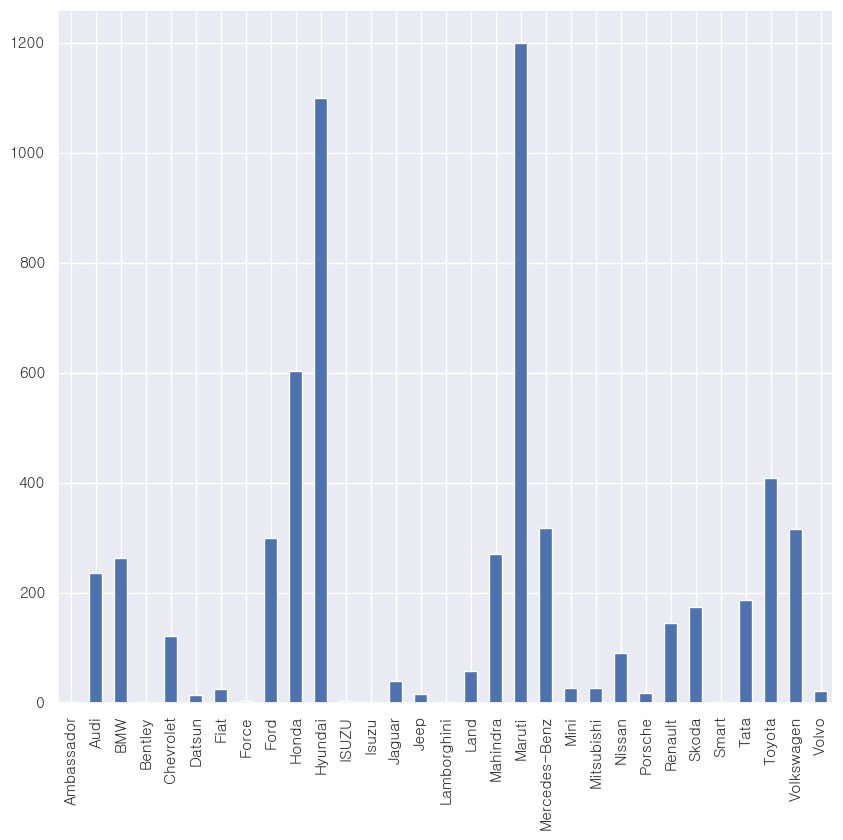

In [23]:
name_count.plot(kind='bar')

In [24]:
data1.groupby('Name').describe()

Year                                                  \
                count         mean       std     min      25%     50%   
Name                                                                    
Ambassador        1.0  2003.000000       NaN  2003.0  2003.00  2003.0   
Audi            236.0  2013.614407  2.302553  2008.0  2012.00  2014.0   
BMW             262.0  2013.083969  2.797202  2006.0  2011.00  2013.0   
Bentley           1.0  2006.000000       NaN  2006.0  2006.00  2006.0   
Chevrolet       121.0  2011.570248  2.676523  2004.0  2010.00  2012.0   
Datsun           13.0  2016.538462  0.776250  2016.0  2016.00  2016.0   
Fiat             25.0  2011.720000  3.668787  2001.0  2010.00  2011.0   
Force             3.0  2014.000000  0.000000  2014.0  2014.00  2014.0   
Ford            300.0  2013.206667  3.519267  2002.0  2011.00  2014.0   
Honda           602.0  2013.093023  3.301487  1999.0  2011.00  2014.0   
Hyundai        1100.0  2013.530000  3.303293  2001.0  2012.00  2014.0   
ISUZU             2.0  2017.500000  0.707107  2017.0  2017.25  2017.5   
Isuzu             1.0  2017.000000       NaN  2017.0  2017.00  2017.0   
Jaguar           40.0  2014.400000  1.997434  2011.0  2012.75  2015.0   
Jeep             15.0  2017.600000  0.632456  2017.0  2017.00  2018.0   
Lamborghini       1.0  2011.000000       NaN  2011.0  2011.00  2011.0   
Land             57.0  2014.421053  2.556137  2010.0  2012.00  2014.0   
Mahindra        271.0  2013.723247  3.082954  2000.0  2012.00  2014.0   
Maruti         1200.0  2013.482500  3.570058  1998.0  2012.00  2014.0   
Mercedes-Benz   318.0  2013.550314  3.496143  1998.0  2011.00  2014.0   
Mini             26.0  2015.076923  1.937484  2012.0  2014.00  2015.0   
Mitsubishi       27.0  2011.111111  4.466399  2001.0  2008.00  2012.0   
Nissan           91.0  2013.186813  1.819109  2008.0  2012.00  2013.0   
Porsche          18.0  2013.222222  2.669117  2008.0  2011.50  2013.0   
Renault         145.0  2014.855172  1.907512  2011.0  2013.00  2015.0   
Skoda           173.0  2012.346821  3.264672  2002.0  2010.00  2013.0   
Smart             1.0  2008.000000       NaN  2008.0  2008.00  2008.0   
Tata            186.0  2013.435484  3.592579  2000.0  2011.00  2014.0   
Toyota          409.0  2013.014670  3.362098  2001.0  2011.00  2013.0   
Volkswagen      315.0  2013.511111  2.210795  2007.0  2012.00  2013.0   
Volvo            21.0  2013.285714  1.978455  2008.0  2012.00  2014.0   

                               Kilometers_Driven                 ...  Engine  \
                   75%     max             count           mean  ...     75%   
Name                                                             ...           
Ambassador     2003.00  2003.0               1.0   80000.000000  ...  1489.0   
Audi           2015.00  2019.0             236.0   53184.885593  ...  2967.0   
BMW            2015.00  2019.0             262.0   79471.381679  ...  2993.0   
Bentley        2006.00  2006.0               1.0   48000.000000  ...  5998.0   
Chevrolet      2014.00  2018.0             121.0   63039.479339  ...  1598.0   
Datsun         2017.00  2018.0              13.0   19239.846154  ...  1198.0   
Fiat           2015.00  2018.0              25.0   73764.560000  ...  1248.0   
Force          2014.00  2014.0               3.0   44000.000000  ...  2200.0   
Ford           2016.00  2019.0             300.0   63318.680000  ...  1498.0   
Honda          2015.00  2019.0             602.0   54831.636213  ...  1498.0   
Hyundai        2016.00  2019.0            1100.0   51279.269091  ...  1582.0   
ISUZU          2017.75  2018.0               2.0   22711.000000  ...  2499.0   
Isuzu          2017.00  2017.0               1.0   34429.000000  ...  2999.0   
Jaguar         2016.00  2018.0              40.0   36380.725000  ...  2993.0   
Jeep           2018.00  2019.0              15.0   27799.800000  ...  1956.0   
Lamborghini    2011.00  2011.0               1.0    6500.000000  ...  5204.0   
Land          

In [25]:
data1.groupby('Name')['Price'].agg(['sum','mean'])

,sum,mean
Name,,
Ambassador,1.35,1.350000
Audi,6347.09,26.894449
BMW,8455.17,32.271641
Bentley,59.00,59.000000
Chevrolet,368.38,3.044463
Datsun,49.01,3.770000
Fiat,90.52,3.620800
Force,28.00,9.333333
Ford,2161.30,7.204333


In [27]:
from scipy import stats
from statsmodels.formula.api import ols, glm

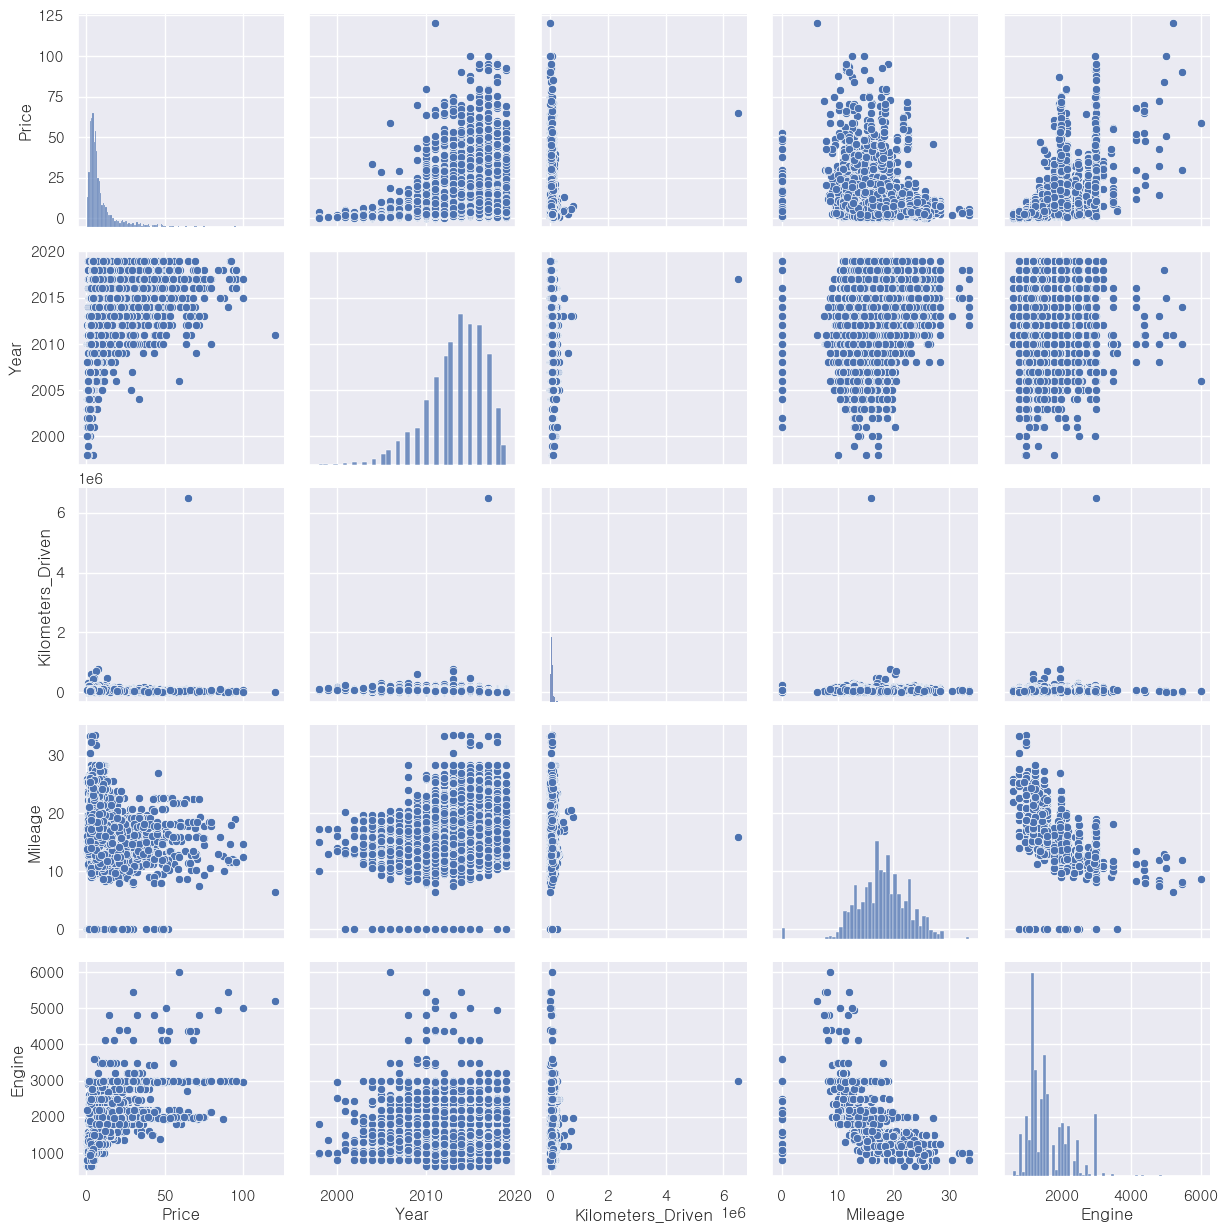

In [28]:
sns.pairplot(data1[['Price','Year','Kilometers_Driven','Mileage','Engine']])
plt.show()

In [29]:
formula = 'Price ~ Year + Kilometers_Driven + Mileage + \
      Engine'

In [30]:
regression_result=ols(formula,data=data1).fit()

In [31]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     1276.
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:53:52   Log-Likelihood:                -21895.
No. Observations:                5981   AIC:                         4.380e+04
Df Residuals:                    5976   BIC:                         4.383e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2535.1279     81.711    -31.025      0.000   -2695.311   -2374.945
Year                  1.2532      0.041     30.768      0.000       1.173       1.333
Kilometers_Driven -2.369e-06   1.36e-06     -1.746      0.081   -5.03e-06    2.91e-07
Mileage               0.0538      0.036      1.500      0.134      -0.017       0.124
Engine                0.0133      0.000     51.614      0.000       0.013       0.014
==============================================================================
Omnibus:                     3677.504   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50659.341
Skew:                           2.726   Prob(JB):                         0.00
Kurtosis:                      16.174   Cond. No.                     7.30e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


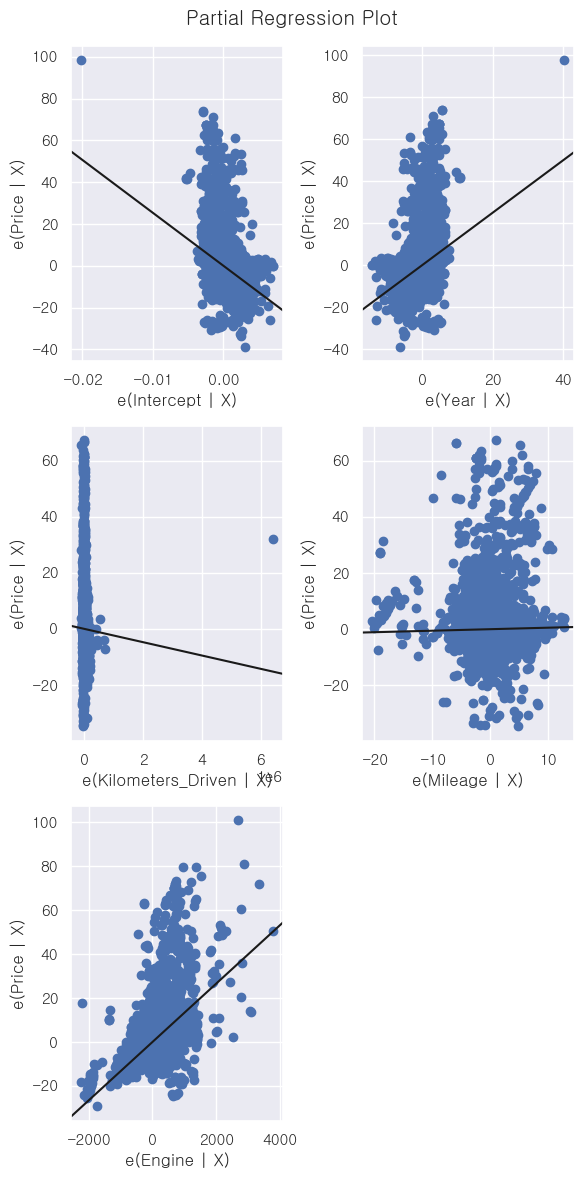

In [32]:
import statsmodels.api as sm
fig=plt.figure(figsize=(6,12))
sm.graphics.plot_partregress_grid(regression_result, fig=fig)
plt.show()

In [44]:
sample=data1[data1.columns.difference(['Price'])] 
sample1=sample[0:10][:]
sample1

,Engine,Kilometers_Driven,Mileage,Name,Year
0,998.0,72000,26.60,Maruti,2010
1,1582.0,41000,19.67,Hyundai,2015
2,1199.0,46000,18.20,Honda,2011
3,1248.0,87000,20.77,Maruti,2012
4,1968.0,40670,15.20,Audi,2013
5,814.0,75000,21.10,Hyundai,2012
6,1461.0,86999,23.08,Nissan,2013
7,2755.0,36000,11.36,Toyota,2016
8,1598.0,64430,20.54,Volkswagen,2013
9,1248.0,65932,22.30,Tata,2012


In [43]:
sample_predict=regression_result.predict(sample1)
print(sample_predict)

0    -1.703388
1    12.037287
2     1.834904
3     3.781631
4    14.429667
5    -1.949801
6     7.994754
7    28.470435
8     9.735275
9     3.913930
dtype: float64


In [41]:
data1[0:10]['Price']

0     1.75
1    12.50
2     8.61
3     6.00
4    17.74
5     2.35
6     3.50
7    21.00
8     5.20
9     1.95
Name: Price, dtype: float64